# Introdução 

Neste notebook, iremos desenvolver um classificador de dígitos escritos a mão a partir do dataset MNIST, um dos mais famosos em visão computacional. 

Ele contem imagens de dígitos escritos a mão coletadas pelo NIST (National Institute of Standards and Technology) e reunidas como um dataset de machine learning por Yann Lecun e seus colegas. 

Lecun usou o MNIST em 1998 no LeNet-5, o primeiro sistema computacional a demonstrar o reconhecimento de sequências de dígitos escritos a mão de forma prática e útil, o que é considerado um dos avanços mais importantes na história da IA. 



## Pixels

Inicialmente, iremos tentar criar um modelo que classifica qualquer imagem como 3 ou 7 apenas. Então, vamos baixar o dataset.

In [3]:
import fastbook 
fastbook.setup_book()

from fastbook import *

path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/home/lucaszampar/.fastai/data/mnist_sample/labels.csv'),Path('/home/lucaszampar/.fastai/data/mnist_sample/valid'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train')]

In [5]:
(path/'train').ls()

(#2) [Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/7')]

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/lucaszampar/.fastai/data/mnist_sample/train/3/10091.png')...]

In [12]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [13]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [14]:
tensor(img3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [15]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## First Try

In [18]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(three_tensors), len(seven_tensors)                    
                                                 
                         

(6131, 6265)

<AxesSubplot:>

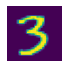

In [21]:
show_image(three_tensors[1])

In [22]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape



torch.Size([6131, 28, 28])

In [23]:
len(stacked_threes.shape)

3

In [24]:
stacked_threes.ndim

3

<AxesSubplot:>

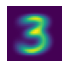

In [33]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<AxesSubplot:>

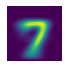

In [28]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<AxesSubplot:>

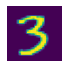

In [35]:
a_3 = stacked_threes[1]
show_image(a_3)

In [36]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqrt = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqrt



(tensor(0.1114), tensor(0.2021))

In [37]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [38]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [40]:
data = [[1, 2, 3], [4, 5, 6]]
arr = array(data)
tns = tensor(data)

In [41]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [43]:
tns[1]

tensor([4, 5, 6])

In [44]:
tns[:,1]

tensor([2, 5])

In [45]:
tns[1, 1:3]

tensor([5, 6])

In [46]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [47]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [49]:
tns.ndim

2

In [90]:
tns = tensor([ [ [1,2], [3,4] ] , [ [5,6],[7,8] ] ] )
tns = tns.float()
tns.mean()

tensor(4.5000)

In [50]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [92]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [93]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1090, 0.1135, 0.1455,  ..., 0.1132, 0.1053, 0.1136]),
 torch.Size([1010]))

# SGD

In [95]:
def pr_eight(x,w): (x*w).sum()

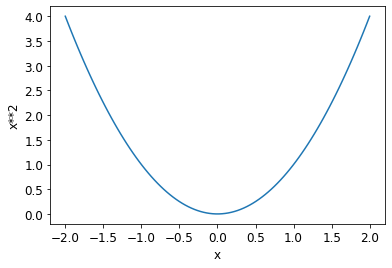

In [98]:
def f(x): return x**2
plot_function(f, 'x', 'x**2');

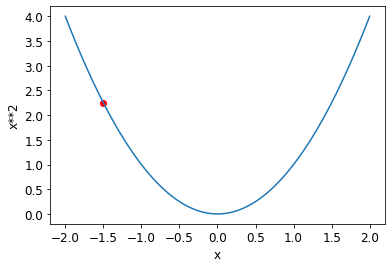

In [97]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [116]:
xt = tensor(3.).requires_grad_()

In [117]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [118]:
yt.backward()

In [119]:
xt.grad

tensor(6.)

In [120]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [121]:
def f(x): return (x**2).sum()

In [122]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [123]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [124]:
time = torch.arange(0,20).float(); time



tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

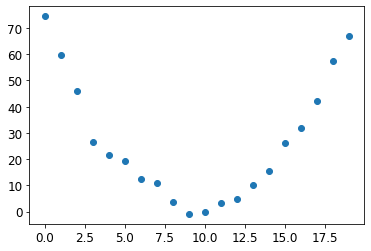

In [125]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);